# 와인의 품질 선별
```
예측모델 만들기
영향을 끼치는 요소들
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### redwine, whitewine 불러와서 합치기

In [2]:
redwine=pd.read_csv("winequality-red.csv",delimiter =';')
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
whitewine = pd.read_csv("winequality-white.csv",delimiter=';')
whitewine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [38]:
redwine=pd.DataFrame(redwine)
whitewine=pd.DataFrame(whitewine)
wine=pd.concat([redwine,whitewine],axis=0)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [39]:
# 상관분석
wine_c=wine.corr()
wine_c

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [40]:
import seaborn as sns

<AxesSubplot:>

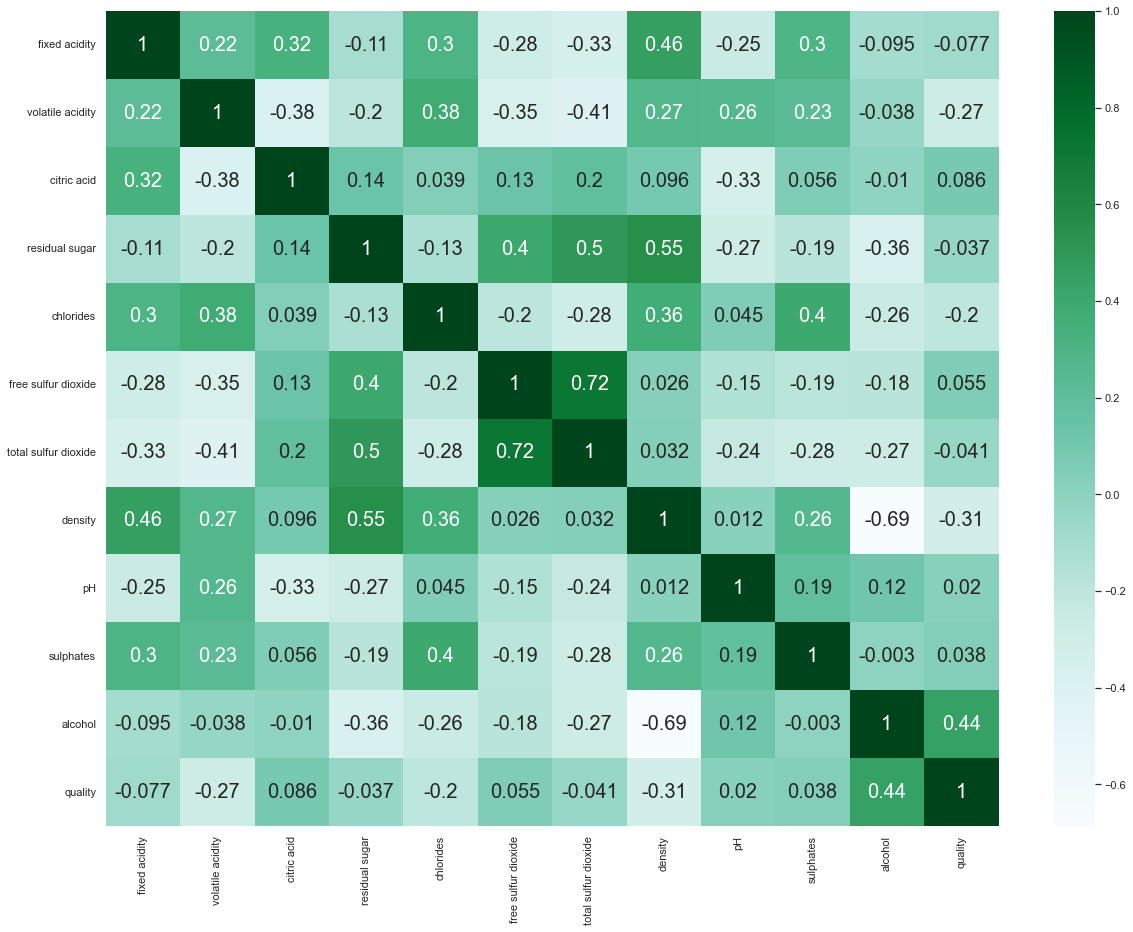

In [42]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(wine_c, annot=True,cmap='BuGn', annot_kws={'size': 20})

In [43]:
# 다중공선성(VIF)
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
X=wine.iloc[:,:-1]
Y=wine.iloc[:,-1]
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [46]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]
vif["feature"] = X.columns
vif

,VIF Factor,feature
0,58.897405,fixed acidity
1,8.943681,volatile acidity
2,9.340251,citric acid
3,3.576148,residual sugar
4,5.575434,chlorides
5,8.452180,free sulfur dioxide
6,14.732237,total sulfur dioxide
7,936.984064,density
8,589.005172,pH
9,18.491253,sulphates


In [51]:
# 다중 공선성이 가장 큰 density 뺴기
X=wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8


In [52]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]
vif["feature"] = X.columns
vif

,VIF Factor,feature
0,41.544278,fixed acidity
1,8.891456,volatile acidity
2,9.339864,citric acid
3,3.264556,residual sugar
4,5.397846,chlorides
5,8.449091,free sulfur dioxide
6,13.366175,total sulfur dioxide
7,142.617127,pH
8,18.216881,sulphates
9,88.514703,alcohol


In [61]:
# ph 빼기
X1=wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']]
X1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.38,12.8


In [62]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) 
                     for i in range(X1.shape[1])]
vif["feature"] = X1.columns
vif

,VIF Factor,feature
0,38.610032,fixed acidity
1,8.510337,volatile acidity
2,9.102097,citric acid
3,3.212878,residual sugar
4,5.238678,chlorides
5,8.427898,free sulfur dioxide
6,12.268613,total sulfur dioxide
7,17.242642,sulphates
8,30.851786,alcohol


In [63]:
# fixed acidity 빼기
X2=wine[['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']]
X2

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8
4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...
4893,0.21,0.29,1.6,0.039,24.0,92.0,0.50,11.2
4894,0.32,0.36,8.0,0.047,57.0,168.0,0.46,9.6
4895,0.24,0.19,1.2,0.041,30.0,111.0,0.46,9.4
4896,0.29,0.30,1.1,0.022,20.0,110.0,0.38,12.8


In [64]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) 
                     for i in range(X2.shape[1])]
vif["feature"] = X2.columns
vif

,VIF Factor,feature
0,7.673075,volatile acidity
1,7.243666,citric acid
2,3.156237,residual sugar
3,5.121110,chlorides
4,8.412305,free sulfur dioxide
5,12.253629,total sulfur dioxide
6,16.239271,sulphates
7,22.918161,alcohol


In [65]:
# sulphates 빼기
X3=wine[['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','alcohol']]
X3

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,9.8
4,0.70,0.00,1.9,0.076,11.0,34.0,9.4
...,...,...,...,...,...,...,...
4893,0.21,0.29,1.6,0.039,24.0,92.0,11.2
4894,0.32,0.36,8.0,0.047,57.0,168.0,9.6
4895,0.24,0.19,1.2,0.041,30.0,111.0,9.4
4896,0.29,0.30,1.1,0.022,20.0,110.0,12.8


In [66]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) 
                     for i in range(X3.shape[1])]
vif["feature"] = X3.columns
vif

,VIF Factor,feature
0,7.505411,volatile acidity
1,7.097524,citric acid
2,3.156201,residual sugar
3,4.393035,chlorides
4,8.405093,free sulfur dioxide
5,12.242192,total sulfur dioxide
6,16.841444,alcohol


In [67]:
# total sulfur dioxide 빼기
X4=wine[['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','alcohol']]
X4

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,alcohol
0,0.70,0.00,1.9,0.076,11.0,9.4
1,0.88,0.00,2.6,0.098,25.0,9.8
2,0.76,0.04,2.3,0.092,15.0,9.8
3,0.28,0.56,1.9,0.075,17.0,9.8
4,0.70,0.00,1.9,0.076,11.0,9.4
...,...,...,...,...,...,...
4893,0.21,0.29,1.6,0.039,24.0,11.2
4894,0.32,0.36,8.0,0.047,57.0,9.6
4895,0.24,0.19,1.2,0.041,30.0,9.4
4896,0.29,0.30,1.1,0.022,20.0,12.8


In [68]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X4.values, i) 
                     for i in range(X4.shape[1])]
vif["feature"] = X4.columns
vif

,VIF Factor,feature
0,7.480890,volatile acidity
1,6.959741,citric acid
2,2.783055,residual sugar
3,4.356308,chlorides
4,4.859466,free sulfur dioxide
5,15.837733,alcohol


In [69]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, Y_train, Y_test =train_test_split(X4,Y,test_size =0.2)

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X4_train, Y_train)

LinearRegression()

In [71]:
lr.score(X4_test,Y_test)

0.25912502752619526

In [72]:
# train data scaled

X4_mean = X4.mean()
X4_std = X4.std()
print(X4_mean, X4_std)

Y_mean = Y.mean()
Y_std = Y.std()
print(Y_mean, Y_std)

volatile acidity        0.339666
citric acid             0.318633
residual sugar          5.443235
chlorides               0.056034
free sulfur dioxide    30.525319
alcohol                10.491801
dtype: float64 volatile acidity        0.164636
citric acid             0.145318
residual sugar          4.757804
chlorides               0.035034
free sulfur dioxide    17.749400
alcohol                 1.192712
dtype: float64
5.818377712790519 0.873255271531111


In [73]:
X4_scaled = (X4-X4_mean)/X4_std
print(X4_scaled)

Y_scaled = (Y-Y_mean)/Y_std
print(Y_scaled)

      volatile acidity  citric acid  residual sugar  chlorides  \
0             2.188664    -2.192664       -0.744721   0.569914   
1             3.281982    -2.192664       -0.597594   1.197883   
2             2.553104    -1.917405       -0.660648   1.026618   
3            -0.362411     1.660957       -0.744721   0.541370   
4             2.188664    -2.192664       -0.744721   0.569914   
...                ...          ...             ...        ...   
4893         -0.787590    -0.197039       -0.807775  -0.486215   
4894         -0.119451     0.284664        0.537383  -0.257863   
4895         -0.605370    -0.885185       -0.891847  -0.429127   
4896         -0.301671    -0.128224       -0.912866  -0.971463   
4897         -0.787590     0.422293       -0.975920  -1.028551   

      free sulfur dioxide   alcohol  
0               -1.100055 -0.915394  
1               -0.311296 -0.580023  
2               -0.874695 -0.580023  
3               -0.762016 -0.580023  
4               -

In [74]:
X4_train, X4_test, Y_train , Y_test = train_test_split(X4_scaled, Y_scaled, test_size=0.2)

In [75]:
print(X4_train.shape,Y_train.shape)
print(X4_test.shape, Y_test.shape)

(5197, 6) (5197,)
(1300, 6) (1300,)


In [76]:
lr.fit(X4_train, Y_train)

LinearRegression()

In [77]:
lr.score(X4_test, Y_test)

0.2444657701002062

In [ ]:
# 다중 선형 회귀

In [81]:
x1=np.array(wine['volatile acidity'])
x2=np.array(wine['citric acid'])
x3=np.array(wine['residual sugar'])
x4=np.array(wine['chlorides'])
x5=np.array(wine['free sulfur dioxide'])
x6=np.array(wine['alcohol'])
y=np.array(wine['quality'])
print(len(x1),len(x2),len(x3),len(x4),len(x5),len(x6),len(y))

6497 6497 6497 6497 6497 6497 6497


In [96]:
# 기울기 절편 초기화
a1=0
a2=0
a3=0
a4=0
a5=0
a6=0
b=0

In [97]:
# 학습률과 학습반복획수 설정
lr = 0.0000015
epochs=10000

In [98]:
for i in range(epochs):
    predict_y= a1*x1 + a2*x2 + a3*x3 + a4*x4 + a5*x5 + a6*x6 + b
    err = y - predict_y
    
    # 편미분 연산
    a1_diff = -(6/len(x1)) * sum(x1*err)
    a2_diff = -(6/len(x2)) * sum(x2*err)
    a3_diff = -(6/len(x3)) * sum(x3*err)
    a4_diff = -(6/len(x4)) * sum(x4*err)
    a5_diff = -(6/len(x5)) * sum(x5*err)
    a6_diff = -(6/len(x6)) * sum(x6*err)
    b_diff = -(6/len(y)) * sum(err)
    
    # 기울기 절편 업데이트
    a1 -= lr*a1_diff
    a2 -= lr*a2_diff
    a3 -= lr*a3_diff
    a4 -= lr*a4_diff
    a5 -= lr*a5_diff
    a6 -= lr*a6_diff
    b -= lr*b_diff
    
    if i % 100 ==0:
        print('epochs = %.04d, a1=%.04f,  a2=%.04f,  a3=%.04f,  a4=%.04f,  a5=%.04f,  a6=%.04f, b=%.04f' % (i,a1,a2,a3,a4,a5,a6,b))
        
print('y= %.04fx1 + %.04fx2 + %.04fx3 + %.04fx4 +%.04fx5 + %.04fx6 + %.04f' % (a1,a2,a3,a4,a5,a6,b))

epochs = 0000, a1=0.0000,  a2=0.0000,  a3=0.0003,  a4=0.0000,  a5=0.0016,  a6=0.0006, b=0.0001
epochs = 0100, a1=0.0012,  a2=0.0011,  a3=0.0171,  a4=0.0002,  a5=0.0918,  a6=0.0374, b=0.0035
epochs = 0200, a1=0.0019,  a2=0.0016,  a3=0.0229,  a4=0.0003,  a5=0.1157,  a6=0.0566, b=0.0053
epochs = 0300, a1=0.0024,  a2=0.0020,  a3=0.0256,  a4=0.0004,  a5=0.1203,  a6=0.0705, b=0.0065
epochs = 0400, a1=0.0028,  a2=0.0023,  a3=0.0272,  a4=0.0005,  a5=0.1194,  a6=0.0826, b=0.0076
epochs = 0500, a1=0.0032,  a2=0.0026,  a3=0.0285,  a4=0.0005,  a5=0.1169,  a6=0.0939, b=0.0086
epochs = 0600, a1=0.0037,  a2=0.0029,  a3=0.0298,  a4=0.0006,  a5=0.1141,  a6=0.1049, b=0.0096
epochs = 0700, a1=0.0040,  a2=0.0032,  a3=0.0309,  a4=0.0006,  a5=0.1111,  a6=0.1155, b=0.0105
epochs = 0800, a1=0.0044,  a2=0.0034,  a3=0.0320,  a4=0.0007,  a5=0.1083,  a6=0.1258, b=0.0114
epochs = 0900, a1=0.0048,  a2=0.0037,  a3=0.0330,  a4=0.0008,  a5=0.1055,  a6=0.1358, b=0.0123
epochs = 1000, a1=0.0052,  a2=0.0039,  a3=0.0340, 

epochs = 8700, a1=0.0162,  a2=0.0124,  a3=0.0474,  a4=0.0027,  a5=0.0175,  a6=0.4613, b=0.0418
epochs = 8800, a1=0.0162,  a2=0.0125,  a3=0.0472,  a4=0.0027,  a5=0.0172,  a6=0.4626, b=0.0419
epochs = 8900, a1=0.0162,  a2=0.0125,  a3=0.0471,  a4=0.0027,  a5=0.0169,  a6=0.4638, b=0.0420
epochs = 9000, a1=0.0163,  a2=0.0126,  a3=0.0470,  a4=0.0027,  a5=0.0166,  a6=0.4650, b=0.0421
epochs = 9100, a1=0.0163,  a2=0.0126,  a3=0.0468,  a4=0.0027,  a5=0.0163,  a6=0.4661, b=0.0422
epochs = 9200, a1=0.0163,  a2=0.0126,  a3=0.0467,  a4=0.0027,  a5=0.0160,  a6=0.4672, b=0.0423
epochs = 9300, a1=0.0163,  a2=0.0127,  a3=0.0466,  a4=0.0028,  a5=0.0158,  a6=0.4683, b=0.0425
epochs = 9400, a1=0.0164,  a2=0.0127,  a3=0.0465,  a4=0.0028,  a5=0.0155,  a6=0.4694, b=0.0426
epochs = 9500, a1=0.0164,  a2=0.0127,  a3=0.0463,  a4=0.0028,  a5=0.0153,  a6=0.4704, b=0.0427
epochs = 9600, a1=0.0164,  a2=0.0128,  a3=0.0462,  a4=0.0028,  a5=0.0150,  a6=0.4714, b=0.0428
epochs = 9700, a1=0.0164,  a2=0.0128,  a3=0.0461, 